In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [4]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/'):
    res = {}
    res[algo] = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                full_path = os.path.join(path, dir, 'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res[algo].append(int(val))
            
    return res

read_data()

{'cm': [0,
  300047,
  588836,
  885574,
  1168813,
  1458429,
  1752952,
  2050724,
  2349696,
  2641443,
  2929825,
  3000575,
  3081744,
  3154544,
  3224930,
  3293746,
  3351539,
  3427959,
  3501728,
  3575153,
  3646633]}

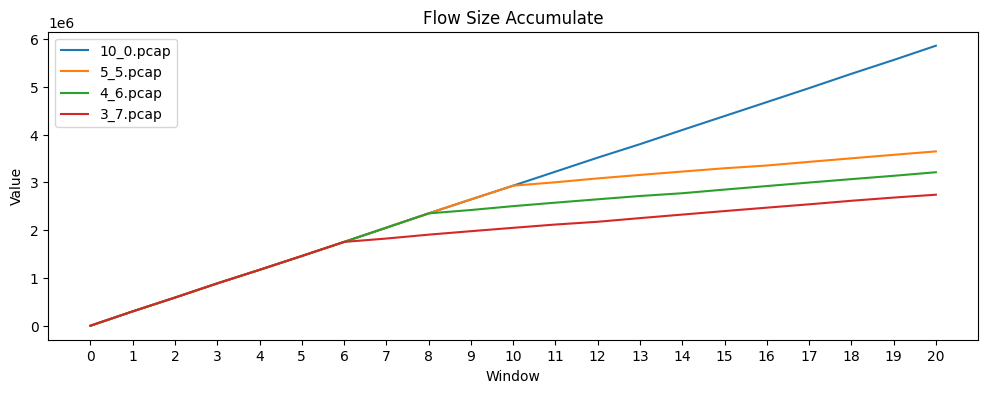

In [23]:
def plot_flow_size_accumulate(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset=['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']):
    
    res = []
    for d in dataset:
        res.append(read_data(algo, row, width, level, seed, count, flowkey, epochs, d)[algo])

    plt.figure(figsize=(12, 4))
    
    for i in range(len(dataset)):
        sns.lineplot(data=res[i], dashes=False, markers=True, label=dataset[i][:-1])
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    
    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title('Flow Size Accumulate')
    # plt.axhline(10000, c="black")
    plt.xticks([i for i in range(21)])
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_flow_size_accumulate()

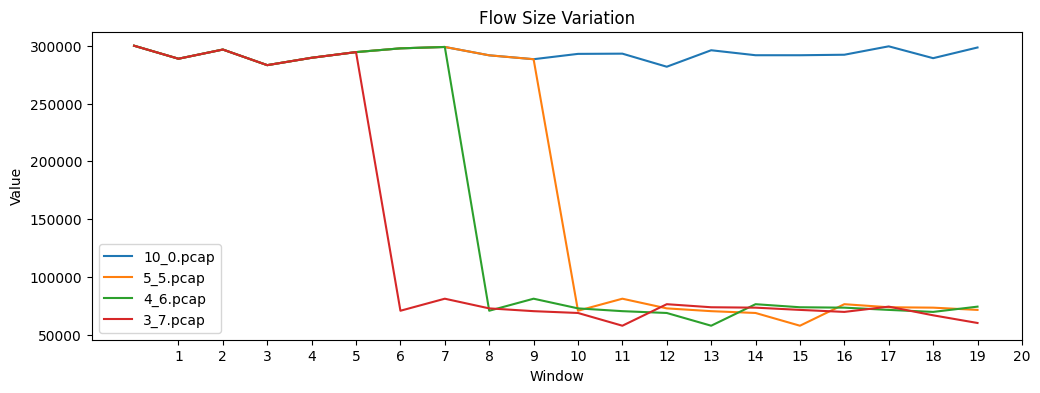

In [22]:
def plot_flow_size_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset=['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']):
    
    res = []
    for d in dataset:
        res.append(read_data(algo, row, width, level, seed, count, flowkey, epochs, d)[algo])
        
    vars = []
    for r in res:
        var = []
        for i in range(1,len(r)):
            var.append(r[i] - r[i-1])
        vars.append(var)

    plt.figure(figsize=(12, 4))
    
    for i in range(len(dataset)):
        sns.lineplot(data=vars[i], dashes=False, markers=True, label=dataset[i][:-1])
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Window')
    plt.ylabel('Value')
    plt.title('Flow Size Variation')
    # plt.axhline(10000, c="black")
    plt.xticks([i for i in range(1, 21)])
    plt.legend(loc='lower left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    
plot_flow_size_variation()